### **A1.2 Regresión lineal**

Según Wikipedia (2025), la felicidad es "una emoción compleja y multifacética que abarca una gama de sentimientos positivos, desde la satisfacción hasta la alegría intensa". Al ser algo un tanto abstracto de medir, desde el 2012 se creó el World Happiness Report (WHR) donde se combina la información del bienestar de alrededor de 140 países. Algunas cosas que considera este estudio son:


*   PIB per cápita
*   Tener a alguien con quién contar
*   Esperanza de vida saludable
*   Libertad para tomar decisiones
*   Generosidad
*   Percepción de la corrupción

Para este reporte se hará una comparación entre el nivel de felicidad vs el PIB (o GDP en inglés). Los datos del nivel de felicidad son de 2022, mientras que los datos de PIB son de 2020.

Se pretende analizar la relación entre la felicidad y las variables económicas y sociales mediante modelos de regresión lineal múltiple.

---
A continuación se carga la base de datos llamada *"A1.2 Felicidad y GDP.csv"* al espacio de trabajo usando la función importando la librería **pandas** y con la función `read_csv`. Posteriormente se utiliza la función `print` y `head(10)` para mostrar los primeros 10 datos de la base de datos y comprobar que funcionen correctamente.
Para contar la cantidad de filas y saber cuántos países están considerados en este estudio se utiliza la función `shape[0]`.  
Además, se utiliza la función `.min` y `.max` para encontrar los valores mínimos y máximos del GDP y poder determinar si será conveniente hacer alguna transformación a estos datos.

In [30]:
import pandas as pd
datos = pd.read_csv('A1.2 Felicidad y GDP.csv')
print(datos.head(10))
print("Cantidad de filas:", datos.shape[0])

gdp_min = datos["GDP"].min()
gdp_max = datos["GDP"].max()
print("GDP mínimo:", gdp_min)
print("GDP máximo:", gdp_max)

          Pais  Felicidad           GDP
0      Finland     7.8210  2.718370e+11
1      Denmark     7.6362  3.560850e+11
2      Iceland     7.5575  2.171808e+10
3  Switzerland     7.5116  7.522480e+11
4  Netherlands     7.4149  9.138650e+11
5   Luxembourg     7.4040  7.335313e+10
6       Sweden     7.3843  5.414870e+11
7       Norway     7.3651  3.621980e+11
8       Israel     7.3638  4.071010e+11
9  New Zealand     7.1998  2.117350e+11
Cantidad de filas: 141
GDP mínimo: 1223876065.0
GDP máximo: 20893700000000.0


Una vez cargada la tabla se puede observar que esta cuenta **3 columnas** que corresponden a lo siguiente:
*  País (Nombre del país al cual pertenece la información)
* Felicidad (Valor de felicidad obtenido por el WHR. Puede ir del 0 al 10)
* GDP (Producto interno bruto)


En el archivo hay **141 países registrados** de los que se analizará esta información.
Tomando en cuenta los 10 primeros datos impresos en el bloque anterior, se puede inferir que la lista organizada de mayor puntaje de felicidad a menor.


De inicio, se podría pensar que entre mayor sea el GDP mayor será el nivel de felicidad de las personas de dicho país, ya que en teoría cuentan con mayor estabilidad, poder adquisitivo, seguridad económica, entre otros que podrían generar un sentimiento de tranquilidad y felicidad dentro de la población. Sin embargo, el GDP sólo habla de temas económicos, no incluye cuestiones sociales como la equidad o la salud promedio de la sociedad. Un ejemplo de esto, con los países que se muestran en el bloque anterior, es Finlandia o Dinamarca, los 2 países más felices del mundo pero con un GDP más pequeño Suiza (cuarto lugar en países más felices).


Además de la **limitación** presentada anteriormente, otro obstáculo que presenta sólo analizar la Felicidad comparándolo con el GDP es que el esta última variable no está considerando las distribuciones de este ingreso. Entonces, en ocasiones, por más alto que sea, puede ser que no sea distribuido equitativamente y esto afecte en el bienestar general de las personas, obteniendo un nivel más bajo de felicidad en el país.


Teniendo valores de GDP con un rango tan amplio podría complicar el análisis. Con este tipo de modelos y rangos tan amplios, es posible que se les asigne una mayor influencia a los valores de los extremos. Además de que puede arrojar un valor de $R^2$ alto y da una falsa sensación de que el modelo se adapta muy bien a la relación. Es por eso que se decide ajustar los datos de GDP a la forma logarítmica.


---  


**Modelo de regresión lineal simple**


Para crear un modelo de regresión lineal simple con relación al nivel de felicidad se utilizará la variable GDP.
Se eligió esta variable porque resulta interesante ver si realmente hay alguna relación entre el producto interno bruto total de un país y el nivel de felicidad de sus ciudadanos. Ya que de tener una fuerte correlación positiva (conforme el GDP crece también aumenta el nivel de felicidad) se debería considerar establecer como prioridad el crecimiento del GDP de un país ya que esto tendrá como consecuencia el bienestar y felicidad de su población.


En el siguiente bloque de código se muestra cómo se utilizarán estas 2 variables para crear un modelo de regresión múltiple para posteriormente analizarlas y poder llegar a una conclusión sobre su relación.


Para abordar el problema del gran rango presente en los valores de GDP se utiliza la función `np.log`.


Se utiliza `LinearRegression()` de la librería sklearn.linear_model, que ayudará a ajustar el modelo de manera más eficiente, sin tener que hacerlo manual. Posteriormente se definen los valores para `x` y `y`, siendo `x` el GDP y `y` el nivel de felicidad. Luego se guarda el resultado en `model`. Después se usa la función `fit` para ajustar el modelo a los datos a analizar. Esta función sólo acepta las variables en forma de arreglo, por lo que se cambia el formato de éstas usando `array` junto con `reshape`, con los parámetros -1 (la función determina la cantidad de filas) y 1 (un arreglo de 1 columna). Por último, se usa `print` para imprimir los coeficientes óptimos obtenidos a través de esta función, usando `intercept_` y `coef_`.  


Para tener un representación gráfica de este modelo se importa la librería **matplotlib.pyplot**.
Se utiliza la función `predict()` para crear los valores de predicción del modelo.
Como los datos puede que no estén en orden, se utiliza la función `argsort` para que acomode los valores en el arreglo.
Posteriormente se utiliza la función `scatter` para añadir los puntos correspondientes a logGDP y la Felicidad. Luego se utiliza la función `plot` para graficar la línea de tendencia que se calculó con el modelo, usando los valores de logGDP en orden y los valores que se predijeron de la Felicidad con el modelo, también en orden.


Por último, en el bloque de código se añade la librería **r2_score** para calcular el valor de $R^2$ del modelo y hacer un mejor análisis.



Intercepto: -1.3023500570747295
Coeficiente: 0.2727927266584911


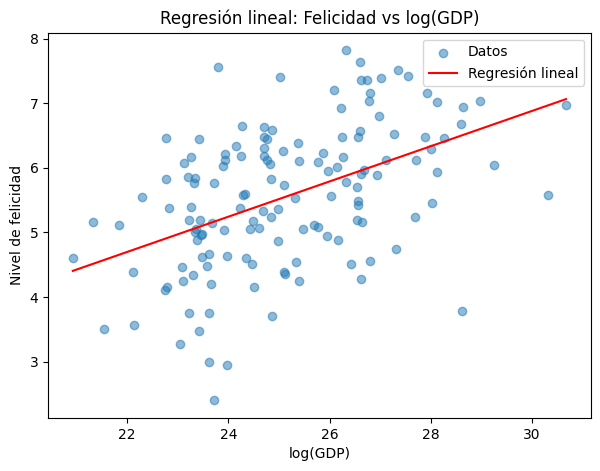

R²: 0.22166361654970634


In [31]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

x_log = np.log(datos["GDP"])
y = datos["Felicidad"]
model_log = LinearRegression()
model_log.fit(np.array(x_log).reshape(-1,1), y)

#Intercerpto y Coeficient
print("Intercepto:", model_log.intercept_)
print("Coeficiente:", model_log.coef_[0])

#Gráfica
y_pred = model_log.predict(np.array(x_log).reshape(-1,1))

indice_orden = np.argsort(x_log)
x_log_sorted = x_log.iloc[indice_orden]
y_pred_sorted = y_pred[indice_orden]

plt.figure(figsize=(7,5))
plt.scatter(x_log, y, alpha=0.5, label="Datos")
plt.plot(x_log_sorted, y_pred_sorted, color="red", label="Regresión lineal")
plt.xlabel("log(GDP)")
plt.ylabel("Nivel de felicidad")
plt.title("Regresión lineal: Felicidad vs log(GDP)")
plt.legend()
plt.show()

#R2
from sklearn.metrics import r2_score

r2 = r2_score(y, y_pred)
print("R²:", r2)


Después de correr las líneas de código del bloque anterior se obtiene un Intercepto de -1.302 y un Coeficiente de 0.273. Con esto se construye la siguiente ecuación:
$$y=-1.302 + 0.273⋅ln(x)$$,
siendo $y$ el nivel de Felicidad y $x$ el GDP.

Observando los puntos azules en la gráfica se puede decir que no hay un patrón evidente entre las dos variables. El coeficiente de 0.273 indica que el aumento de una unidad de log(GDP) resulta en un aumento de 0.273 puntos en el nivel de la felicidad.  
Se obtuvo un valor de $R^2 = 0.22$ que significa que sólo el 22% de la variación del nivel de felicidad entre países se explica por el log(GDP).

Este modelo de regresión simple muestra una relación positiva con la felicidad, aunque es pequeño este aumento por cada unidad. Sin embargo, al tener un valor de $R^2$ de 0.22 demuestra que sólo tomar el GDP para predecir el nivel de felicidad de un país no es suficiente para hacer un cálculo realmente atinado.






---


**Modelo de regresión Lineal Múltiple**


Para hacer un modelo de regresión lineal múltiple se decidió agregar las siguiente variables:
*   Tasa de Fertilidad de 2022 (representa el número de hijos tendría en promedio una mujer a lo largo de su vida, si durante sus años fértiles tuviera hijos según los niveles de natalidad que existen en un año determinado, de acuerdo con World Bank Open Data (n.d.))
*  Expectativa de Vida de 2022 (representa cuántos años de vida se espera que viva un bebé recién nacido, suponiendo que las condiciones de mortalidad actuales se mantengan iguales durante toda su vida, de acuerdo con World Bank Open Data (n.d.))
*   Densidad Poblacional de 2021 (Personas por kilómetro cuadrado, según United Nations Economic Commission for Europe, (n.d.))


Los valores para las primeras 2 variables fueron obtenidas de World Bank Group. Este grupo es un equipo de 5 organizaciones internacionales que dan préstamos apalancados a países en desarrollo.  
Los valores para la tercera variable fueron obtenidos de la UNECE, Comisión Económica de las Naciones Unidas para Europa, la cuál tiene como objetivo promover la integración económica paneuropea.






En el bloque de código a continuación muestra que se cargan los datos al espacio de trabajo con la función `read_csv()`.
Posteriormente se utiliza la función `merge()` para combinar los datos de todas las columnas y quitar todos los países que no cuenten con toda la información a analizar. Dentro de esta función se utilizan `on = "Pais"` para indicar en qué columna están los datos que deben coincidir, en `inner`se indica que sólo se quede en la nueva tabla los países que aparecen en ambas bases de datos.


Para comprobar que esto sea correcto se imprimen los 10 primeros valores de esta nueva tabla con la función `head()` y se imprime la nueva cantidad de filas (países).



In [32]:
vida =  pd.read_csv('A1.2 Esperanza de Vida.csv')
fert = pd.read_csv('A.1.2 Fertilidad.csv')
dens = pd.read_csv('A1.2 Densidad Poblacional.csv')

#Tabla con solo los paises c/todos los valores
todos_merge = datos.merge(vida, on="Pais", how="inner")
todos_merge = todos_merge.merge(fert, on="Pais", how="inner")
todos_merge = todos_merge.merge(dens, on="Pais", how="inner")
print(todos_merge.head(10))
print("Cantidad de países:", todos_merge.shape[0])


          Pais  Felicidad           GDP  LifeExpectancy  FertilityRate  \
0      Finland     7.8210  2.718370e+11       81.187805          1.320   
1      Denmark     7.6362  3.560850e+11       81.304878          1.550   
2      Iceland     7.5575  2.171808e+10       82.119512          1.589   
3  Switzerland     7.5116  7.522480e+11       83.604878          1.390   
4  Netherlands     7.4149  9.138650e+11       81.614634          1.490   
5   Luxembourg     7.4040  7.335313e+10       82.946341          1.310   
6       Sweden     7.3843  5.414870e+11       83.058537          1.530   
7       Norway     7.3651  3.621980e+11       82.509756          1.410   
8       Israel     7.3638  4.071010e+11       82.700000          2.890   
9      Austria     7.1630  4.332580e+11       81.295122          1.410   

   PopulationDensity  
0               16.4  
1              135.9  
2                3.6  
3              210.8  
4              422.2  
5              247.5  
6               23.1  
7

Se obtuvo que sólo de 45 se tienen todos los valores de las variables a analizar, menos de la mitad de cantidad de valores iniciales.


Por las mismas razones que en la regresión lineal simple se transformaron los valores de GDP a forma logarítmica, para este modelo también se realizará lo mismo. Ya transformados los valores se agregan a la tabla inicial de los 45 países para poder usarlos más adelante para el análisis.


A continuación se añaden todas las variables independientes `log_GDP`, `LifeExpectancy`, `FertilityRate` y `PopulationDensity` a la variable `X`, como una matriz, y los valores de `Felicidad` de los 45 países a la variable dependiente `Y`.


Posteriormente se utiliza la función `LinearRegression()` para crear un modelo de regresión lineal, con múltiples variables independientes.


Después se utiliza `intercept_` para encontrar el intercepto. De igual manera, se crea una tabla con el valor del coeficiente estimado para cada variable, usando la función `multiple.coef_`


In [33]:
todos_merge["log_GDP"] = np.log(todos_merge["GDP"])
X = todos_merge[["log_GDP", "LifeExpectancy", "FertilityRate", "PopulationDensity"]]
Y = todos_merge["Felicidad"]

modelo_multiple = LinearRegression()
modelo_multiple.fit(X,Y)

#Intercerpto y Coeficientes
print("Intercepto:", modelo_multiple.intercept_)
coeficientes = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": modelo_multiple.coef_
})

print(coeficientes)

#R2
Y_pred = modelo_multiple.predict(X)
r2_m = r2_score(Y, Y_pred)

print("R² del modelo múltiple:", r2_m)


Intercepto: -8.905157078245768
            Variable  Coeficiente
0            log_GDP     0.107527
1     LifeExpectancy     0.153247
2      FertilityRate     0.334603
3  PopulationDensity    -0.000177
R² del modelo múltiple: 0.6542009358953993


El modelo arroja una $R^2=0.654$ lo que quiere decir que este modelo explica el 65.4% de la variación entre el nivel de felicidad entre países considerando estos factores.


A continuación se presenta una tabla con las variables, sus coeficientes y su interpretación.


**Tabla 1. Coeficientes de cada variable con interpretación**


| Varaible | Coeficiente | Interpretación|
| :--- | :--- | :--- |
|log_GDP | 0.107527 | Por cada 1% de aumento en GDP, la felicidad aumenta 0.00108 puntos|
|LifeExpectancy| 0.153247| Por cada año adicional de esperanza de vida, aumenta la felicidad 0.15 puntos|
FertilityRate| 0.334603| Por cada 1 hijo extra que tenga una mujer se aumenta la felicidad 0.33 puntos|
PopulationDensity| -0.000177| Por cada punto de densidad que aumenta un país, el nivel de felicidad decrece 0.000177|  


   
*  El GDP tiene un efecto positivo en la felicidad ya que podría implicar que las personas generan más y tienen mayor estabilidad económica.
*  La esperanza de vida tiene un efecto positivo. Esto podría deberse a la idea de todas las satisfacciones y metas que se podrían lograr teniendo tantos años para vivir.
*  La tasa de fertilidad también tiene un efecto positivo con respecto a la felicidad. Esto podría deberse a poder cumplir el deseo de preservar la humanidad, al igual que los genes de esas personas.
*  La densidad poblacional tiene un efecto negativo con respecto a los niveles de felicidad. Esto se puede deber a temas de higiene, menor espacio personal/habitacional, contaminación auditiva y del aire, entre otros factores que afectan a las personas que viven en ciudades muy pobladas.




---


**Comparación entre ambos modelos**


Para el modelo de **Regresión Lineal Simple** se obtuvo que ese modelo sólo puede predecir el 22% de la variación del nivel de felicidad con respecto al log(GDP), un modelo que deja bastante a desear. Mientras que el modelo de **Regresión Lineal Simple** puede predecir el 65% de la variación entre la felicidad y log_GDP, esperanza de vida, tasa de fertilidad y densidad poblacional. Aunque este modelo también está lejos de un 100%, es mucho más confiable que el primero modelo que se realizó. Esto demuestra que el nivel de felicidad de las personas no sólo depende del GDP, o de un sólo factor si vamos al caso, si no que este nivel es un cúmulo de múltiples factores (económicos, salud, educación, conflictos políticos, equidad, entre otros) que llevan un bienestar general en las personas y tienen como consecuencia un nivel más alto de felicidad.  
Es por esto mismo que al querer hacer un modelo para predecir algo tan complejo y abstracto como lo es la felicidad, es necesario involucrar muchas variables, tantas como sean posibles y relevantes, para tener una idea clara de cómo podrían cambiar las cosas en el futuro.  


**Limitaciones**


Algunas de las limitaciones de este análisis fueron la poca cantidad de países que quedaron una vez que se eliminaron a aquellos que no tenían todos los datos. De igual manera, otro obstáculo presente en este reporte fue que no todos los datos eran del mismo año. Por ejemplo, el GDP corresponde al 2020, año de la pandemia que pudo haber alterado los resultados finales. Mientras que la felicidad, tasa de fertilidad y esperanza de vida fueron datos obtenidos para el 2022. Al mismo tiempo que la densidad poblacional corresponde a los valores del año 2021. Esto causa que el modelo final y la relación entre variables no sea del todo real, ya que las situaciones de cada país, y del mundo en general, pueden cambiar mucho año con año.


**Trabajo a futuro**  
Como líneas de trabajo en el futuro, se propone incluir más variables explicativas, para así poder crear un modelo que pueda ayudar a tener mejor comprensión de los factores que afectan la felicidad y a qué nivel. De igual manera, se propone hacer un análisis de las mismas variables pero en diferentes años.





**Referencias**

* Colaboradores de Wikipedia. (2025, December 7). Felicidad. Wikipedia, La Enciclopedia Libre. https://es.wikipedia.org/wiki/Felicidad
* Population density - Data Portal - United Nations Economic Commission for Europe. (n.d.). https://w3.unece.org/PXWeb/en/Table?IndicatorCode=22
* World Bank Open Data. (n.d.). World Bank Open Data. https://data.worldbank.org/indicator/SP.DYN.TFRT.IN
* World Bank Open Data. (n.d.). World Bank Open Data. https://data.worldbank.org/indicator/SP.DYN.LE00.IN?most_recent_value_desc=false

**Código de Honor**: Doy mi palabra que he realizado esta actividad con integridad académica.  

Se implementó el uso de IA unicamente para dudas de redacción y código.

